In [ ]:
pip install pandas ollama textblob

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install scikit-ollama

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import ollama

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from skollama.models.ollama.classification.zero_shot import ZeroShotOllamaClassifier

In [ ]:
# Step 1: Load the dataset
# Make sure you upload the 'reddit_comments.csv' file to your Colab environment
# or change the data_path to the correct location.
data_path = '/content/reddit_comments.csv'
data = pd.read_csv(data_path)

In [ ]:
# Step 2: Initial Exploration
print("Dataset Head:")
print(data.head())

print("\nDataset Info:")
data.info()

In [ ]:
# Step 3: Cleaning the Data
# Check for null values in the 'raw_comment' column.
print("\nNull Values:")
print(data.isnull().sum())

# Drop rows where 'raw_comment' is null and reset the index
data.dropna(subset=['raw_comment'], inplace=True)
data.reset_index(drop=True, inplace=True)

# Remove URLs, special characters, and extra whitespace from the comments.
data['cleaned_comment'] = data['raw_comment'].str.replace(r'http\S+', '', regex=True)
data['cleaned_comment'] = data['cleaned_comment'].str.replace(r'[^A-Za-z0-9 ]+', '', regex=True)
data['cleaned_comment'] = data['cleaned_comment'].str.strip()

In [ ]:
data.to_csv("/Processed_reddit_comments.csv", index=False)

In [ ]:
#textblob

In [ ]:
data = pd.read_csv("Processed_reddit_comments.csv")
data.head()

In [ ]:
# Step 4: Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis function to the cleaned comments.
data['textblob_sentiment'] = data['cleaned_comment'].apply(get_sentiment)

In [ ]:
data.to_csv("/textblob_sentiment_analysis_results.csv", index=False)

In [ ]:
#Llama 3.2 1b

In [ ]:
df = pd.read_csv("Processed_reddit_comments.csv")
df.head()

In [ ]:
# Initialize the ZeroShotOllamaClassifier
clf = ZeroShotOllamaClassifier(model='llama3.2:1b')

# Define the candidate labels
candidate_labels = ['positive', 'negative', 'neutral']

# Fit the classifier (no training data needed for zero-shot)
clf.fit(None, candidate_labels)

# Predict the sentiment of each news title as a new colum in our DataFrame
df['llama_sentiment'] = clf.predict(df['cleaned_comment'])

In [ ]:
df.to_csv("/llama_sentiment_analysis_results.csv", index=False)

In [ ]:
#Visualizing the textblob and llama data

In [ ]:
data = pd.read_csv("textblob_sentiment_analysis_results.csv")
df = pd.read_csv("llama_sentiment_analysis_results.csv")

In [ ]:
sentiment_order = ["Negative", "Neutral", "Positive"]

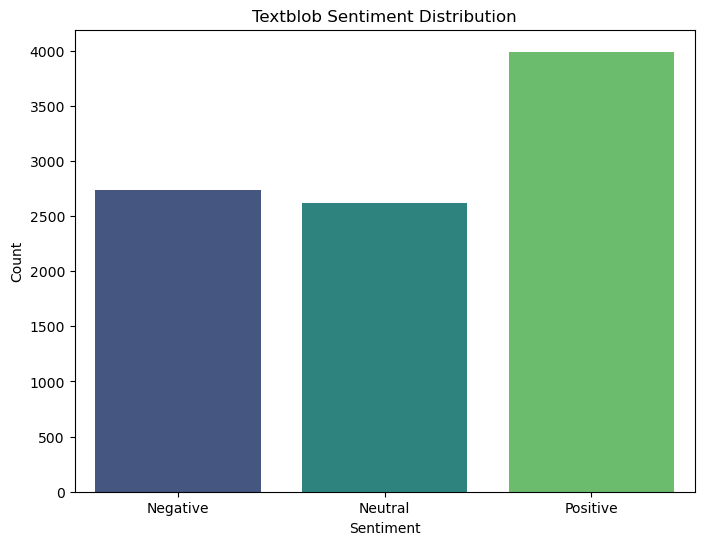

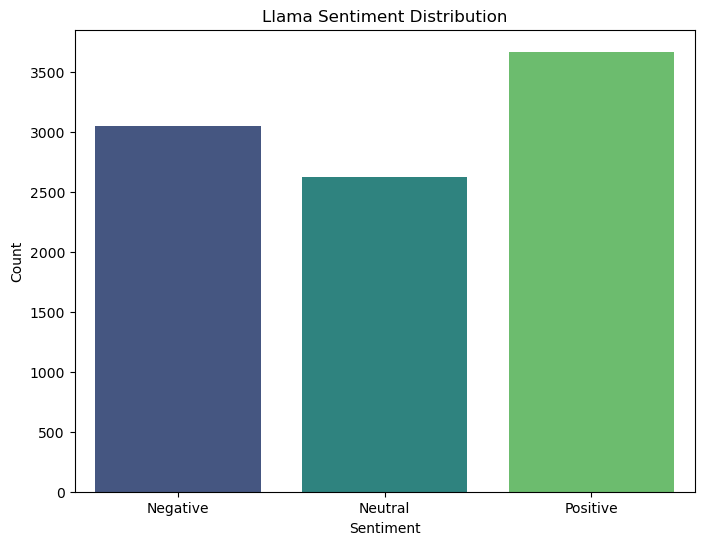

In [ ]:
# Step 5: Visualizations

#Text/blob
# Sentiment Distribution (Countplot)
plt.figure(figsize=(8, 6))
sns.countplot(x='textblob_sentiment', data=data, palette='viridis',order=sentiment_order)
plt.title('Textblob Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

#Llama
# Sentiment Distribution (Countplot)
plt.figure(figsize=(8, 6))
sns.countplot(x='llama_sentiment', data=df, palette='viridis',order=sentiment_order)
plt.title('Llama Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

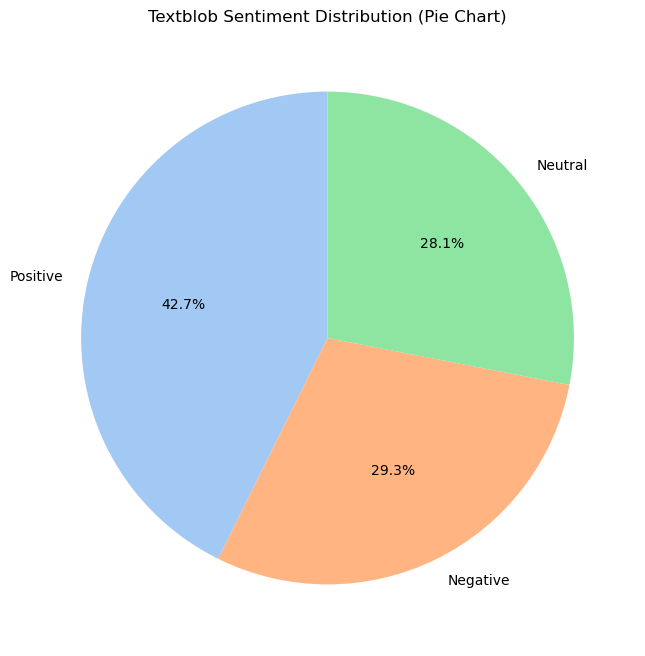

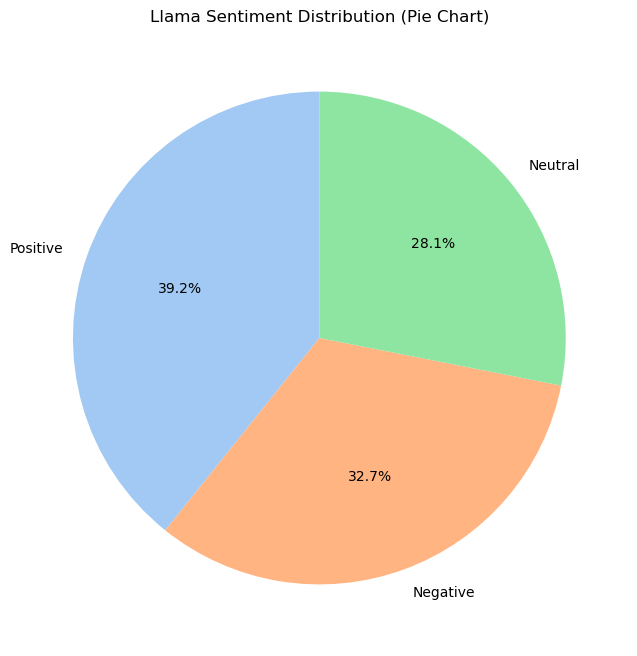

In [ ]:
# Textblob Sentiment Distribution (Pie Chart)
sentiment_counts = data['textblob_sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Textblob Sentiment Distribution (Pie Chart)')
plt.show()

# Llama Sentiment Distribution (Pie Chart)
sentiment_counts = df['llama_sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Llama Sentiment Distribution (Pie Chart)')
plt.show()

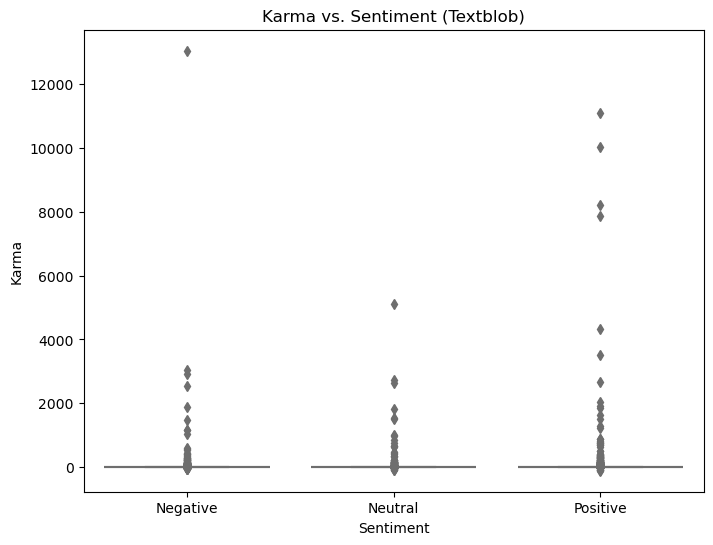

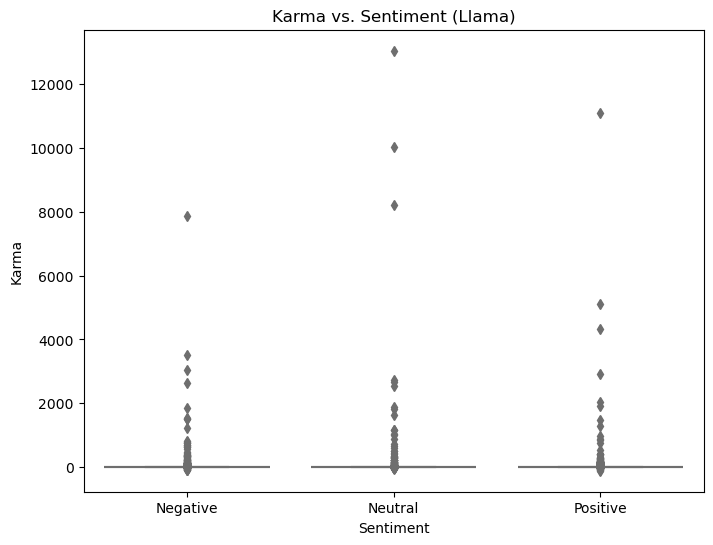

In [ ]:
# Karma vs. Textblob Sentiment (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='textblob_sentiment', y='karma', data=data, palette='coolwarm',order=sentiment_order)
plt.title('Karma vs. Sentiment (Textblob)')
plt.xlabel('Sentiment')
plt.ylabel('Karma')
plt.show()

# Karma vs. Llama Sentiment (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='llama_sentiment', y='karma', data=df, palette='coolwarm',order=sentiment_order)
plt.title('Karma vs. Sentiment (Llama)')
plt.xlabel('Sentiment')
plt.ylabel('Karma')
plt.show()

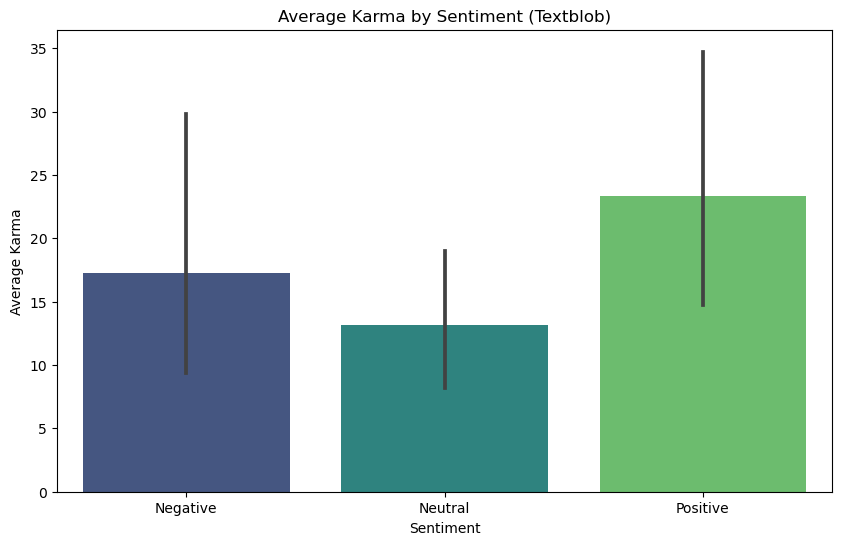

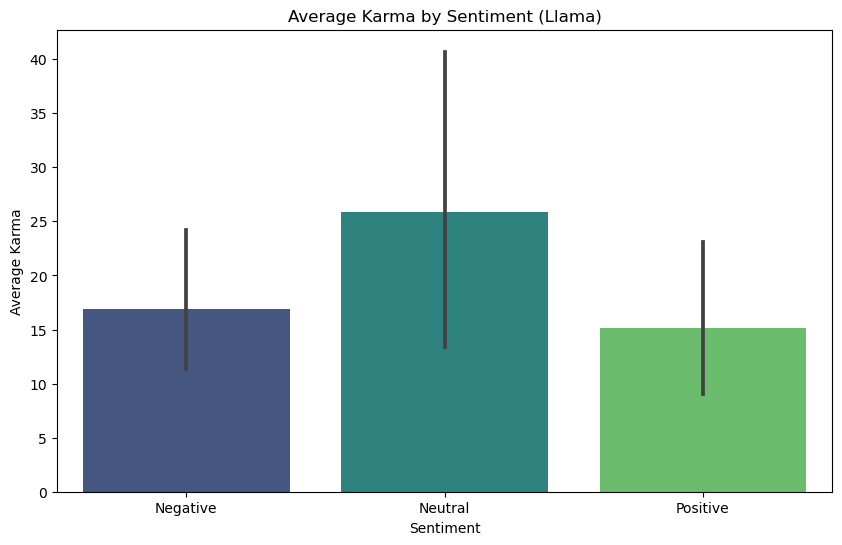

In [ ]:
# Average Karma by Sentiment Textblob(Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(x='textblob_sentiment', y='karma', data=data, estimator=np.mean, palette='viridis',order=sentiment_order)
plt.title('Average Karma by Sentiment (Textblob)')
plt.xlabel('Sentiment')
plt.ylabel('Average Karma')
plt.show()

# Average Karma by Sentiment Llama(Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(x='llama_sentiment', y='karma', data=df, estimator=np.mean, palette='viridis',order=sentiment_order)
plt.title('Average Karma by Sentiment (Llama)')
plt.xlabel('Sentiment')
plt.ylabel('Average Karma')
plt.show()


In [ ]:
#Textblob vs Llama

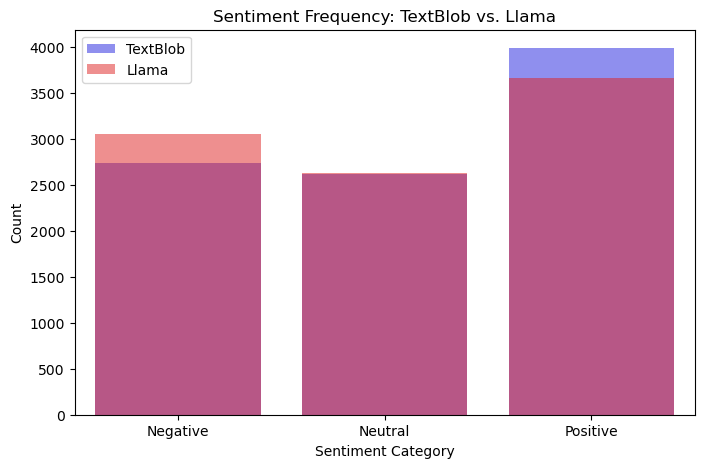

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="textblob_sentiment", data=data, color="blue", label="TextBlob", alpha=0.5,order=sentiment_order)
sns.countplot(x="llama_sentiment", data=df, color="red", label="Llama", alpha=0.5,order=sentiment_order)
plt.title("Sentiment Frequency: TextBlob vs. Llama")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.legend()
plt.show()

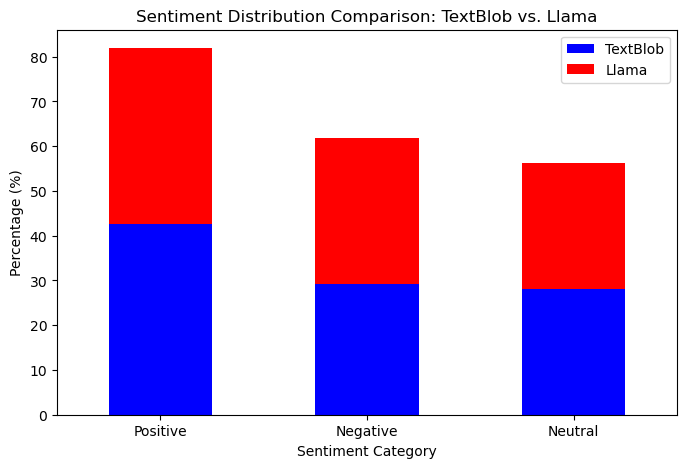

In [ ]:
# Normalize counts to get percentage
textblob_percent = (textblob_counts / textblob_counts.sum()) * 100
llama_percent = (llama_counts / llama_counts.sum()) * 100

# Create DataFrame for plotting
sentiment_percentage = pd.DataFrame({"TextBlob": textblob_percent, "Llama": llama_percent}).fillna(0)

# 📊 Stacked Bar Chart
sentiment_percentage.plot(kind="bar", stacked=True, figsize=(8, 5), color=["blue", "red"])
plt.title("Sentiment Distribution Comparison: TextBlob vs. Llama")
plt.xlabel("Sentiment Category")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.legend(["TextBlob", "Llama"])
plt.show()


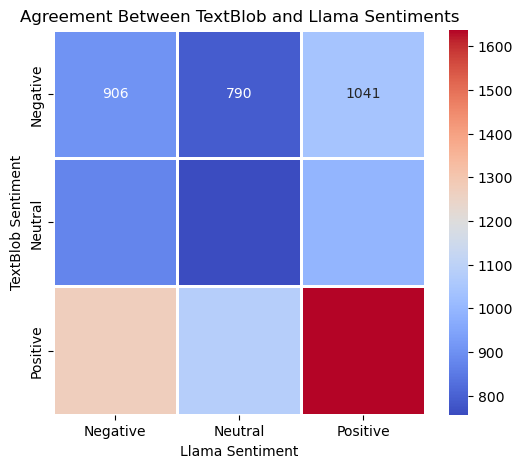

In [ ]:
import numpy as np

# Create a confusion matrix-like table
agreement_matrix = pd.crosstab(data["textblob_sentiment"], df["llama_sentiment"])

# 📊 Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(agreement_matrix, annot=True, cmap="coolwarm", fmt="d", linewidths=1)

plt.title("Agreement Between TextBlob and Llama Sentiments")
plt.xlabel("Llama Sentiment")
plt.ylabel("TextBlob Sentiment")
plt.show()
